In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [28]:
df=pd.read_csv("C:/Users/91823/OneDrive/Desktop/assignment/2022_02_08-02_30_31_AM.csv")
df

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
...,...,...,...,...,...,...
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,$69.99,NaN,Um9vbSBkZWNvcg,UGxhbnRlcnMvVmFzZXM,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz
13729998,25677eee-c26b-4abf-bd10-ca77a800ba26,NaN,NaN,U2F1Y2U,QkJRIFNhdWNl,Z3JvY2VyaWVz


## Converting Data Type

In [29]:
#Removing dollar and commas from the price Columns and converting Object datatype to float datatype 
df['price_string']=df['price_string'].str.replace('[\$\,]','',regex= True)
df['price_string']=df['price_string'].astype(float)
df['price_string_unf']=df.price_string_unf.replace('[^\d.]','',regex= True)
df['price_string_unf'] = pd.to_numeric(df['price_string_unf'],errors='coerce')


In [30]:
#Checking the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   uuid              object 
 1   price_string      float64
 2   price_string_unf  float64
 3   product_type      object 
 4   level_1           object 
 5   category          object 
dtypes: float64(2), object(4)
memory usage: 628.5+ MB


## Product Without Price

In [31]:
# fill null values with NAN
df=df.fillna(value= 'NAN')
#Filtering out product without price
product_without_price= df.loc[(df['price_string_unf'] == 'NAN') & (df['price_string'] == 'NAN')]
product_without_price.head(10)

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NAN,NAN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NAN,NAN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,NAN,NAN,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,NAN,NAN,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
16,7bad39f5-74b9-4611-afb9-46fb135190cd,NAN,NAN,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
19,524886b5-7cc2-4a57-be26-f021f083889a,NAN,NAN,TWF0ZXJuaXR5IFBhZHM,UG9zdHBhcnR1bSBQYWRz,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
20,ae346b86-21ff-4310-9cb4-f2693c8a8f66,NAN,NAN,RWR1Y2F0aW9uYWwgQmxvY2tzL1RveXM,TnVtYmVyIFRveXM,VG95cyBhbmQgR2FtZXM
21,cc3dd359-7aa9-414e-a7df-63583c26434c,NAN,NAN,UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw,S2V0byBEaWV0IFdlaWdodCBsb3NzIHBsYW50IGJhc2VkIH...,SGVhbHRo
22,327e1b21-5ba7-464c-ae45-914936bb6064,NAN,NAN,Q2FuZGxlcy9GcmFnbmFuY2Vz,Q2FuZGxlcw,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
24,9e740140-648a-4970-9ea6-4d517a7214aa,NAN,NAN,bWVucyBCb2R5IFNvYXAvIEJvZHl3YXNo,bWVucyBCb2R5d2FzaA,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl


## Product With Price

In [32]:
#Filtering out product with price
product_with_price= df.loc[(df['price_string_unf'] != 'NAN') & (df['price_string'] != 'NAN')]
product_with_price

,uuid,price_string,price_string_unf,product_type,level_1,category
115,8e4fdac3-afc9-4242-9136-90d13e116724,6.75,6.75,Q29mZmVlIEJlYW5z,RGFyayBSb2FzdA,Z3JvY2VyaWVz
116,53beedf4-ed7c-4407-9081-7ae41f3a7282,15.0,15.0,RG91Z2ggSmFy,UGxheWRvdWdoIC8gUGxheWRvaA,VG95cyBhbmQgR2FtZXM
176,d3a85b19-cf28-413a-b8ee-518622025bdd,18.95,18.95,QmFieSBXaXBlcw,QmFieSBXaXBlcw,QmFieWNhcmU
182,623f06c9-5147-471a-a58f-162caca48a32,459.99,459.99,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU
198,d72603be-24ec-4cbe-b74f-3e6175f7d4d6,619.0,619.0,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,U3Ryb2xsZXJz,QmFieWNhcmU
...,...,...,...,...,...,...
13729692,d72603be-24ec-4cbe-b74f-3e6175f7d4d6,619.0,619.0,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,U3Ryb2xsZXJz,QmFieWNhcmU
13729785,05ddee10-cde7-41f7-99d9-d0bc2f43a9cf,25.0,25.0,RG91Z2ggS2l0L1Byb2plY3Q,UGxheSBEb3VnaCBLaXQvUHJvamVjdA,VG95cyBhbmQgR2FtZXM
13729916,1235c157-0b13-494d-99fb-02b2b386bc78,10.0,10.0,UGV0IFRyZWF0cw,RG9nIFRyZWF0cw,cGV0IHN1cHBsaWVz
13729934,296ef8b5-619c-47f1-8ea4-88870c21c6eb,49.0,49.0,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU


In [33]:
# Adding Dollar Sign Before price
format_dict1 = {'price_string':'${0:,.2f}','price_string_unf':'${0:,.2f}'}
product_with_price.head(20).style.format(format_dict1).hide_index()

C:\Users\91823\AppData\Local\Temp\ipykernel_9268\2719770111.py:3: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  product_with_price.head(20).style.format(format_dict1).hide_index()


uuid,price_string,price_string_unf,product_type,level_1,category
8e4fdac3-afc9-4242-9136-90d13e116724,$6.75,$6.75,Q29mZmVlIEJlYW5z,RGFyayBSb2FzdA,Z3JvY2VyaWVz
53beedf4-ed7c-4407-9081-7ae41f3a7282,$15.00,$15.00,RG91Z2ggSmFy,UGxheWRvdWdoIC8gUGxheWRvaA,VG95cyBhbmQgR2FtZXM
d3a85b19-cf28-413a-b8ee-518622025bdd,$18.95,$18.95,QmFieSBXaXBlcw,QmFieSBXaXBlcw,QmFieWNhcmU
623f06c9-5147-471a-a58f-162caca48a32,$459.99,$459.99,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU
d72603be-24ec-4cbe-b74f-3e6175f7d4d6,$619.00,$619.00,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,U3Ryb2xsZXJz,QmFieWNhcmU
8ac98685-b973-4aa9-bb2c-39a3b5bbbaf5,$85.00,$85.00,TWF0ZXJuaXR5IERyZXNz,TWF0ZXJuaXR5IE1pZGkgZHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
806c516d-b994-40ea-a453-aaf656d7f33c,$24.00,$24.00,WW9nYSBBY2Nlc3Nvcmllcy8gR2Vhcg,eW9nYSBzdHJhcHM,SGVhbHRo
2199eb4b-a72b-4f7f-b83c-2ef3282e78ec,$99.00,$99.00,WW9nYSBNYXRz,RWNvIGZyaWVuZGx5IHlvZ2EgbWF0cw,SGVhbHRo
1fb9489b-8127-4ec4-9263-a5d791065df5,$6.75,$6.75,Q29mZmVlIEJlYW5z,TWVkaXVtIFJvYXN0,Z3JvY2VyaWVz
623f06c9-5147-471a-a58f-162caca48a32,$459.99,$459.99,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU


## Count of product/category/level_1 without prices

In [34]:
#Counting the Unique rows in each column and converting it to dataframe
count= product_without_price.nunique().reset_index()
#Slicing out the unnecessary columns 
count= count.iloc[3: , :]
# Assigning desired index to given axis (to use the table for plotting the graph)
count.set_axis(['type', '0'], axis='columns', inplace=True)
#Changing the Column Name
count.rename(columns = {"0":'count','index':'type'},inplace = True)
count

,type,count
3,product_type,279
4,level_1,476
5,category,14


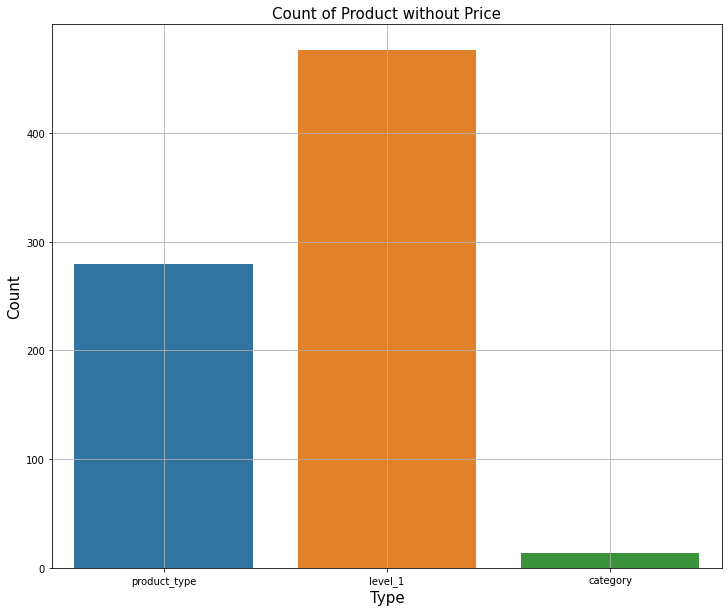

In [35]:
plt.figure(figsize=(12,10))
sns.barplot(data = count ,x="type" ,y="count")
plt.grid()
plt.title("Count of Product without Price", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Type", fontsize=15)
plt.show()

## Count of product/category/level_1 with prices

In [36]:
product_with_price.nunique()

uuid                22
price_string        18
price_string_unf    18
product_type        14
level_1             21
category             6
dtype: int64

In [37]:
#Counting the Unique rows in each column and converting it to dataframe
count1= product_with_price.nunique().reset_index()
#Slicing out the unnecessary columns 
count1= count1.iloc[3: , :]
# Assigning desired index to given axis (to use the table for plotting the graph)
count1.set_axis(['type', '0'], axis='columns', inplace=True)
#Changing the Column Name
count1.rename(columns = {"0":'count','index':'type'},inplace = True)
count1

,type,count
3,product_type,14
4,level_1,21
5,category,6


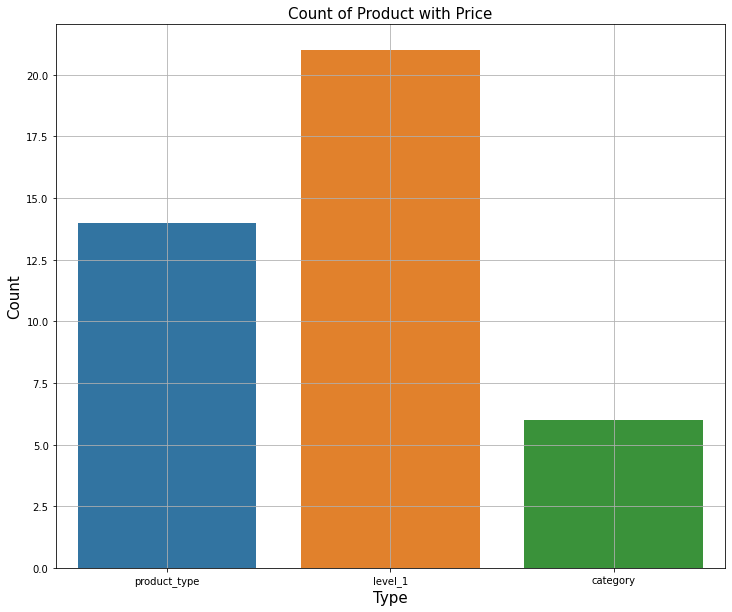

In [38]:
plt.figure(figsize=(12,10))
sns.barplot(data = count1 ,x="type" ,y="count")
plt.grid()
plt.title("Count of Product with Price", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Type", fontsize=15)
plt.show()

## Average Price of Category

In [39]:
# Grouping by the category Column and taking mean using the aggregate function
average_price=product_with_price.groupby('category').agg({'price_string':'mean'}).reset_index()
average_price.rename(columns = {'price_string':'average_pricing'},inplace = True)
average_price

,category,average_pricing
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,96.000000
1,QmFieWNhcmU,195.153333
2,SGVhbHRo,50.666667
3,VG95cyBhbmQgR2FtZXM,20.000000
4,Z3JvY2VyaWVz,6.750000
5,cGV0IHN1cHBsaWVz,29.666667


## Changing the Price Format

In [40]:
# Adding Dollar Sign Before price
format_dict = {'average_pricing':'${0:,.2f}'}
average_price.style.format(format_dict).hide_index()

C:\Users\91823\AppData\Local\Temp\ipykernel_9268\1977634843.py:3: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  average_price.style.format(format_dict).hide_index()


category,average_pricing
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,$96.00
QmFieWNhcmU,$195.15
SGVhbHRo,$50.67
VG95cyBhbmQgR2FtZXM,$20.00
Z3JvY2VyaWVz,$6.75
cGV0IHN1cHBsaWVz,$29.67


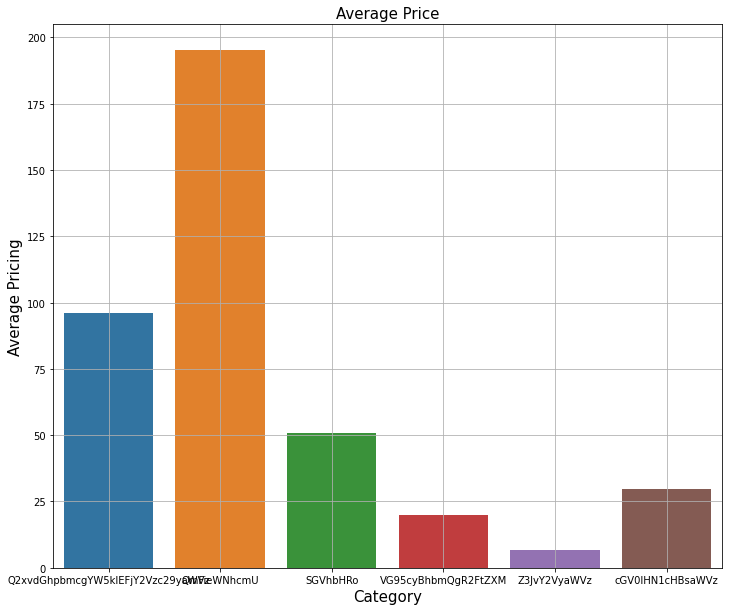

In [41]:
plt.figure(figsize=(12,10))
sns.barplot(data = average_price ,x="category" ,y="average_pricing")
plt.grid()
plt.title("Average Price", fontsize=15)
plt.ylabel("Average Pricing",fontsize=15)
plt.xlabel("Category", fontsize=15)
plt.show()